**SENTIMENT ANALYSIS MENGGUNAKAN KLASIFIKASI RANDOM FORES : Maulana Rafinda**


Melakukan Scrapping Data terhadap komentar untuk aplikasi Tokopedia

In [1]:
!pip install google-play-scraper

In [2]:
# Mengimport library yang diperlukan

from google_play_scraper import app

import pandas as pd # Memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

import numpy as np # Menyediakan Fungsi Bawaan untuk Aljabar Linier dan Pembuatan Bilangan Acak

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews (
    'com.traveloka.android',
    lang = 'id', # Mengatur bahasa ke dalam bahasa indonesia.
    country = 'id', # Setting ke negara Indonesia.
    sort = Sort.MOST_RELEVANT, # Kemudian kita atur ke MOST_RELEVANT agar kemontar yang kita dapatkan itu adalah komentar yang paling relevant.
    count = 1000, # Kita akan mengambil 1000 komentar yang akan kita jadikan penelitian sentiment analysis.
    filter_score_with = None # Score yang akan kita ambil adalah bintang 1 - 5.
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7040e3a5-7581-4bd0-91ea-4a3526872747,mahirrk 29,https://play-lh.googleusercontent.com/a/AAcHTt...,Gak heran sama limit paylatter yang turun pada...,5,27,3.79.0,2023-06-14 19:53:35,None,NaT,3.79.0
1,4168390f-c726-4ecc-9603-469c2c76d927,Aryani Novitasari,https://play-lh.googleusercontent.com/a/AAcHTt...,Traveloka sangat membantu dalam pencarian hote...,5,23,3.78.0,2023-06-14 13:07:43,"Halo Kak, terima kasih banyak atas ratingnya, ...",2023-06-14 13:12:12,3.78.0
2,9b068fb8-4062-4176-bccc-e502c90f238c,Suryo Super,https://play-lh.googleusercontent.com/a-/AD_cM...,"Pembayarannya ribet sekarang, pake UANGKU sdh ...",1,176,3.77.1,2023-05-28 10:51:12,Halo Suryo. Mohon maaf atas ketidaknyamanan ya...,2023-05-28 11:18:08,3.77.1
3,f43dca4a-e4c7-4600-bff8-53aeae58a533,riki putra,https://play-lh.googleusercontent.com/a/AAcHTt...,"Sebenarnya fitur Traveloka bagus dan menarik, ...",5,77,3.77.1,2023-05-24 22:00:31,"Hai Riki, Maaf banget atas kendala yang kamu a...",2023-05-24 22:13:17,3.77.1
4,373b8637-f056-46d9-bef9-f7757784a236,Jempol polan,https://play-lh.googleusercontent.com/a/AAcHTt...,Sampai saat ini aplikasi traveloka gak bisa lo...,2,48,3.78.0,2023-06-02 10:47:02,"Hai, Kak. Mohon maaf sebelumnya. Untuk membant...",2023-06-02 11:15:02,3.78.0


In [5]:
len(df_busu.index) # Untuk mengetahui jumlah ulasan yang discraping

1000

In [6]:
df_busu[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,mahirrk 29,5,2023-06-14 19:53:35,Gak heran sama limit paylatter yang turun pada...
1,Aryani Novitasari,5,2023-06-14 13:07:43,Traveloka sangat membantu dalam pencarian hote...
2,Suryo Super,1,2023-05-28 10:51:12,"Pembayarannya ribet sekarang, pake UANGKU sdh ..."
3,riki putra,5,2023-05-24 22:00:31,"Sebenarnya fitur Traveloka bagus dan menarik, ..."
4,Jempol polan,2,2023-06-02 10:47:02,Sampai saat ini aplikasi traveloka gak bisa lo...


In [7]:
new_df = df_busu[['userName', 'score', 'at', 'content']]
sorted_df = new_df.sort_values(by= 'at', ascending = False)
sorted_df.head()

,userName,score,at,content
0,mahirrk 29,5,2023-06-14 19:53:35,Gak heran sama limit paylatter yang turun pada...
611,seto sugiyanto,1,2023-06-14 19:18:59,Susah reschedule tidak seperti dulu pelayanannya
939,Didik Rijadi,5,2023-06-14 18:09:21,Sejak dulu saya dan keluarga klo bepergian sel...
7,Singgih Utami,2,2023-06-14 17:13:40,Saya mau transaksi pake traveloka jd kawatir.....
172,Elok Muchsin,5,2023-06-14 13:25:00,"mudah, murah, menarik diskonnya, banyak piliha..."


In [8]:
my_df = sorted_df[['userName', 'score', 'at', 'content']] # Menyimpan ke dalam variabel my_df 

In [9]:
my_df = my_df[['content', 'score']]

In [10]:
my_df.head()

,content,score
0,Gak heran sama limit paylatter yang turun pada...,5
611,Susah reschedule tidak seperti dulu pelayanannya,1
939,Sejak dulu saya dan keluarga klo bepergian sel...,5
7,Saya mau transaksi pake traveloka jd kawatir.....,2
172,"mudah, murah, menarik diskonnya, banyak piliha...",5


⬇️ **Pelabelan**

In [11]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
0,Gak heran sama limit paylatter yang turun pada...,5,Positif
611,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif
939,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif
7,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif
172,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif
1,Traveloka sangat membantu dalam pencarian hote...,5,Positif
42,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif
174,"sangat membantu dalam keperluan liburan, terim...",5,Positif
541,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif
579,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif


In [13]:
my_df.to_csv("scrapped_data_traveloka.csv", index = False) # Menyimpan Data.

⬇️ **Data Cleaning**

In [14]:
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('scrapped_data_traveloka.csv')
my_df.head(10)

,content,score,Label
0,Gak heran sama limit paylatter yang turun pada...,5,Positif
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif


In [15]:
 my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    925 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [18]:
my_df.isna() #Fungsi isna sendiri untuk menampilkan data komentar yang mengandung nilai Null (bintang 3)

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [19]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [20]:
my_df.describe()

,score
count,1000.000000
mean,3.209000
std,1.797373
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [21]:
my_df.isnull().sum() # Menghitung jumlah baris yang bernilai null 

content     0
score       0
Label      75
dtype: int64

⬇️ **Selanjutnya menghapus nilai Null (kosong) dengan menggunakan Handling Missing Value-Ingnore Tuple.**

In [22]:
my_df.dropna(subset=['Label'],inplace = True)

In [23]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [24]:
my_df.head(10)

,content,score,Label
0,Gak heran sama limit paylatter yang turun pada...,5,Positif
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif


In [25]:
my_df.to_csv("traveloka_prepocessing.csv", index = False) # Menyimpan kembali data hasil Cleaning

⬇️ **Text PreProcessing**

In [26]:
import pandas as pd
df = pd.read_csv('traveloka_prepocessing.csv')
df.head(50)

,content,score,Label
0,Gak heran sama limit paylatter yang turun pada...,5,Positif
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif


⬇️ **Case Folding**

In [27]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # Menghapus angka
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return my_df

In [28]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,Gak heran sama limit paylatter yang turun pada...,5,Positif,gak heran sama limit paylatter yang turun pada...
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif,susah reschedule tidak seperti dulu pelayanannya
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif,sejak dulu saya dan keluarga klo bepergian sel...
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif,saya mau transaksi pake traveloka jd kawatir k...
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif,mudah murah menarik diskonnya banyak pilihannya
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif,traveloka sangat membantu dalam pencarian hote...
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif,tiket udh dibayar tiba tiba dibatalkan mau di ...
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif,sangat membantu dalam keperluan liburan terima...
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif,alhamdulillah dgn traveloka perjalanan lebih m...
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif,bagus memudahkan memesan tiket ada promo juga


⬇️ **Stopword Removal**

In [29]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,Gak heran sama limit paylatter yang turun pada...,5,Positif,gak heran sama limit paylatter yang turun pada...,gak heran limit paylatter turun pembayaran on ...
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif,susah reschedule tidak seperti dulu pelayanannya,susah reschedule pelayanannya
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif,sejak dulu saya dan keluarga klo bepergian sel...,keluarga klo bepergian pesan tiket traveloka p...
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif,saya mau transaksi pake traveloka jd kawatir k...,transaksi pake traveloka jd kawatir krn komenn...
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif,mudah murah menarik diskonnya banyak pilihannya,mudah murah menarik diskonnya pilihannya
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif,traveloka sangat membantu dalam pencarian hote...,traveloka membantu pencarian hotel senang rati...
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif,tiket udh dibayar tiba tiba dibatalkan mau di ...,tiket udh dibayar dibatalkan reschedule aplika...
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif,sangat membantu dalam keperluan liburan terima...,membantu keperluan liburan terima kasih traveloka
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif,alhamdulillah dgn traveloka perjalanan lebih m...,alhamdulillah dgn traveloka perjalanan mudah
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif,bagus memudahkan memesan tiket ada promo juga,bagus memudahkan memesan tiket promo


⬇️ **Tokenizing**

In [30]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Gak heran sama limit paylatter yang turun pada...,5,Positif,gak heran sama limit paylatter yang turun pada...,gak heran limit paylatter turun pembayaran on ...,"[gak, heran, limit, paylatter, turun, pembayar..."
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif,susah reschedule tidak seperti dulu pelayanannya,susah reschedule pelayanannya,"[susah, reschedule, pelayanannya]"
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif,sejak dulu saya dan keluarga klo bepergian sel...,keluarga klo bepergian pesan tiket traveloka p...,"[keluarga, klo, bepergian, pesan, tiket, trave..."
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif,saya mau transaksi pake traveloka jd kawatir k...,transaksi pake traveloka jd kawatir krn komenn...,"[transaksi, pake, traveloka, jd, kawatir, krn,..."
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif,mudah murah menarik diskonnya banyak pilihannya,mudah murah menarik diskonnya pilihannya,"[mudah, murah, menarik, diskonnya, pilihannya]"


⬇️ **Stemming**

In [31]:
!pip install Sastrawi


In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)
     

3155
------------------------
1 : gak : gak
2 : heran : heran
3 : limit : limit
4 : paylatter : paylatter
5 : turun : turun
6 : pembayaran : bayar
7 : on : on
8 : time : time
9 : gw : gw
10 : ngga : ngga
11 : dipakai : pakai
12 : bayar : bayar
13 : double : double
14 : traveloka : traveloka
15 : kasih : kasih
16 : solusi : solusi
17 : komplain : komplain
18 : berkali : kali
19 : data : data
20 : menyelesaikan : selesai
21 : parah : parah
22 : sih : sih
23 : susah : susah
24 : reschedule : reschedule
25 : pelayanannya : layan
26 : keluarga : keluarga
27 : klo : klo
28 : bepergian : pergi
29 : pesan : pesan
30 : tiket : tiket
31 : mudah : mudah
32 : jaminan : jamin
33 : kembalirefund : kembalirefund
34 : lakukan : laku
35 : pokok : pokok
36 : ok : ok
37 : transaksi : transaksi
38 : pake : pake
39 : jd : jd
40 : kawatir : kawatir
41 : krn : krn
42 : komennya : komennya
43 : byk : byk
44 : yg : yg
45 : bintang : bintang
46 : bntar : bntar
47 : lg : lg
48 : musim : musim
49 : liburan : libu

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Gak heran sama limit paylatter yang turun pada...,5,Positif,gak heran sama limit paylatter yang turun pada...,gak heran limit paylatter turun pembayaran on ...,"[gak, heran, limit, paylatter, turun, pembayar...",gak heran limit paylatter turun bayar on time ...
1,Susah reschedule tidak seperti dulu pelayanannya,1,Negatif,susah reschedule tidak seperti dulu pelayanannya,susah reschedule pelayanannya,"[susah, reschedule, pelayanannya]",susah reschedule layan
2,Sejak dulu saya dan keluarga klo bepergian sel...,5,Positif,sejak dulu saya dan keluarga klo bepergian sel...,keluarga klo bepergian pesan tiket traveloka p...,"[keluarga, klo, bepergian, pesan, tiket, trave...",keluarga klo pergi pesan tiket traveloka pesan...
3,Saya mau transaksi pake traveloka jd kawatir.....,2,Negatif,saya mau transaksi pake traveloka jd kawatir k...,transaksi pake traveloka jd kawatir krn komenn...,"[transaksi, pake, traveloka, jd, kawatir, krn,...",transaksi pake traveloka jd kawatir krn komenn...
4,"mudah, murah, menarik diskonnya, banyak piliha...",5,Positif,mudah murah menarik diskonnya banyak pilihannya,mudah murah menarik diskonnya pilihannya,"[mudah, murah, menarik, diskonnya, pilihannya]",mudah murah tarik diskon pilih
5,Traveloka sangat membantu dalam pencarian hote...,5,Positif,traveloka sangat membantu dalam pencarian hote...,traveloka membantu pencarian hotel senang rati...,"[traveloka, membantu, pencarian, hotel, senang...",traveloka bantu cari hotel senang rating hotel...
6,"Tiket udh dibayar tiba tiba dibatalkan, mau di...",2,Negatif,tiket udh dibayar tiba tiba dibatalkan mau di ...,tiket udh dibayar dibatalkan reschedule aplika...,"[tiket, udh, dibayar, dibatalkan, reschedule, ...",tiket udh bayar batal reschedule aplikasi gang...
7,"sangat membantu dalam keperluan liburan, terim...",5,Positif,sangat membantu dalam keperluan liburan terima...,membantu keperluan liburan terima kasih traveloka,"[membantu, keperluan, liburan, terima, kasih, ...",bantu perlu libur terima kasih traveloka
8,alhamdulillah dgn traveloka perjalanan lebih m...,5,Positif,alhamdulillah dgn traveloka perjalanan lebih m...,alhamdulillah dgn traveloka perjalanan mudah,"[alhamdulillah, dgn, traveloka, perjalanan, mu...",alhamdulillah dgn traveloka jalan mudah
9,"Bagus, memudahkan memesan tiket. Ada promo juga",5,Positif,bagus memudahkan memesan tiket ada promo juga,bagus memudahkan memesan tiket promo,"[bagus, memudahkan, memesan, tiket, promo]",bagus mudah mes tiket promo


In [34]:
data_clean.to_csv('hasil_TextPreProcessing_traveloka.csv', index= False) #Menyimpan kembali hasil preprocessing ke dalam file dengan format csv

In [35]:
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

⬇️ **Splitting Data :**
Memecah data test 20% dari keseluruhan data.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

⬇️ Pembobotan TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(740,)
(740,)
(185,)
(185,)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [40]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
     

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [43]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [44]:
X_train.toarray()
     

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
y_pred = rf.predict(X_test)


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8864864864864865


<Axes: xlabel='Label'>

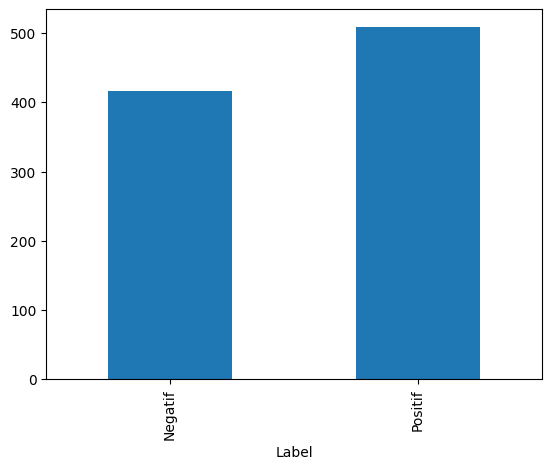

In [56]:
my_df.groupby(['Label']).size().plot(kind="bar")
